# Reflection Spectra over Frequencies for Radar Design

In this example, we reproduce the result of Fig. 6 in the work [1].

[1] Eric Michielssen, Jean-Michel Sajer, S. Ranjithan, and Raj Mittra. [Design of lightweight, broad-band microwave absorbers using genetic algorithms](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=238519&casa_token=cAzTLiuvjPcAAAAA:iW8Ema9V9aE9lUAGOst4mGaeFeh45hGqOAJY1-ieAXdYcAqUmrNo1d3PpHUrecssvVvZzWK6rg&tag=1). *IEEE Transactions on Microwave Theory and Techniques*, vol. 41, no. 6, pp. 1024–1031, 1993.

First, the required packages are imported.

In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as onp

import jaxlayerlumos as jll
import jaxlayerlumos.utils_materials as jll_utils_materials
import jaxlayerlumos.utils_units as jll_utils_units

We define frequencies from 0.2 GHz to 2 GHz and an incidence angle 0$^\circ$.

In [2]:
freq_range = (0.2, 2.0)
inc_angle = 0.0

frequencies = jnp.linspace(freq_range[0] * jll_utils_units.get_giga(), freq_range[1] * jll_utils_units.get_giga(), 100)
frequencies_in_ghz = onp.array(frequencies) / jll_utils_units.get_giga()

Radar designs suggested in the work [1] are specified. Then, the details of four radar designs are printed.

In [3]:
designs = [
    {
        "materials_data": ["14", "8", "4", "4", "4"],
        "thicknesses_in_mm": [0.966, 1.002, 1.182, 0.984, 1.380],
        "ref_R_in_db": -32.52
    },
    {
        "materials_data": ["16", "4", "4", "4", "4"],
        "thicknesses_in_mm": [0.516, 1.092, 1.440, 0.306, 0.234],
        "ref_R_in_db": -20.60
    },
    {
        "materials_data": ["14", "4", "4", "4", "4"],
        "thicknesses_in_mm": [0.180, 0.738, 0.918, 0.984, 0.114],
        "ref_R_in_db": -18.03
    },
    {
        "materials_data": ["4", "4", "4", "4", "4"],
        "thicknesses_in_mm": [0.636, 1.284, 0.126, 0.156, 0.276],
        "ref_R_in_db": -15.50
    }
]

for i, design in enumerate(designs):
    materials_data = design["materials_data"]
    thicknesses_in_mm = design["thicknesses_in_mm"]
    ref_R_in_db = design["ref_R_in_db"]

    materials = ["Air"] + materials_data + ["PEC"]
    thicknesses = jnp.array([0.0] + [thickness * jll_utils_units.get_milli() for thickness in thicknesses_in_mm] + [0.0])

    print(f"Design {i + 1}:")
    print("  Material layout:", materials)
    print("  Layer thicknesses (m):", thicknesses)
    print("  Reference R (db):", ref_R_in_db)

Design 1:
  Material layout: ['Air', '14', '8', '4', '4', '4', 'PEC']
  Layer thicknesses (m): [0.       0.000966 0.001002 0.001182 0.000984 0.00138  0.      ]
  Reference R (db): -32.52
Design 2:
  Material layout: ['Air', '16', '4', '4', '4', '4', 'PEC']
  Layer thicknesses (m): [0.       0.000516 0.001092 0.00144  0.000306 0.000234 0.      ]
  Reference R (db): -20.6
Design 3:
  Material layout: ['Air', '14', '4', '4', '4', '4', 'PEC']
  Layer thicknesses (m): [0.       0.00018  0.000738 0.000918 0.000984 0.000114 0.      ]
  Reference R (db): -18.03
Design 4:
  Material layout: ['Air', '4', '4', '4', '4', '4', 'PEC']
  Layer thicknesses (m): [0.       0.000636 0.001284 0.000126 0.000156 0.000276 0.      ]
  Reference R (db): -15.5


In the next cell, we compare our results to the reference results.

In [4]:
Rs_in_db = []
ref_Rs_in_db = []

for i, design in enumerate(designs):
    materials_data = design["materials_data"]
    thicknesses_in_mm = design["thicknesses_in_mm"]
    ref_R_in_db = design["ref_R_in_db"]

    materials = ["Air"] + materials_data + ["PEC"]
    thicknesses = jnp.array([0.0] + [thickness * jll_utils_units.get_milli() for thickness in thicknesses_in_mm] + [0.0])

    eps_stack, mu_stack = jll_utils_materials.get_eps_mu(materials, frequencies)
    R_TE, _, R_TM, _ = jll.stackrt_eps_mu(eps_stack, mu_stack, thicknesses, frequencies, inc_angle)
    R = (R_TE + R_TM) / 2.0
    R_in_db = 10 * jnp.log10(R).squeeze()

    print(f"Design {i + 1}: max(R_in_db) {onp.max(R_in_db):.2f} ref_R_in_db {ref_R_in_db:.2f}")
    Rs_in_db.append(R_in_db)
    ref_Rs_in_db.append(ref_R_in_db)

Rs_in_db = onp.array(Rs_in_db)
ref_Rs_in_db = onp.array(ref_Rs_in_db)

Design 1: max(R_in_db) -32.50 ref_R_in_db -32.52
Design 2: max(R_in_db) -20.57 ref_R_in_db -20.60
Design 3: max(R_in_db) -18.00 ref_R_in_db -18.03
Design 4: max(R_in_db) -15.50 ref_R_in_db -15.50


The results of reflection spectra over frequencies are plotted.

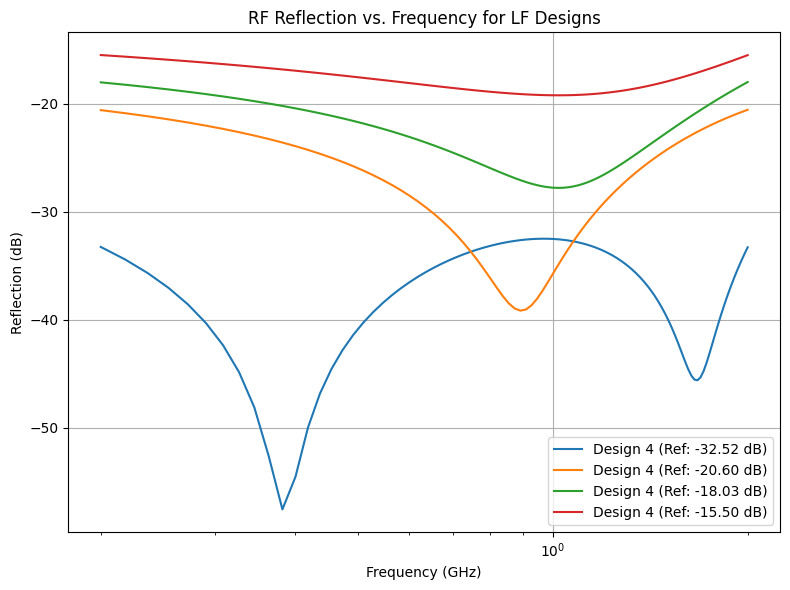

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

for R_in_db, ref_R_in_db in zip(Rs_in_db, ref_Rs_in_db):
    ax.semilogx(frequencies_in_ghz, onp.array(R_in_db), label=f"Design {i + 1} (Ref: {ref_R_in_db:.2f} dB)")

ax.set_xlabel("Frequency (GHz)")
ax.set_ylabel("Reflection (dB)")
ax.set_title("RF Reflection vs. Frequency for LF Designs")
ax.grid()

plt.legend()
plt.tight_layout()
plt.show()